In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Number of stars detected: 22910


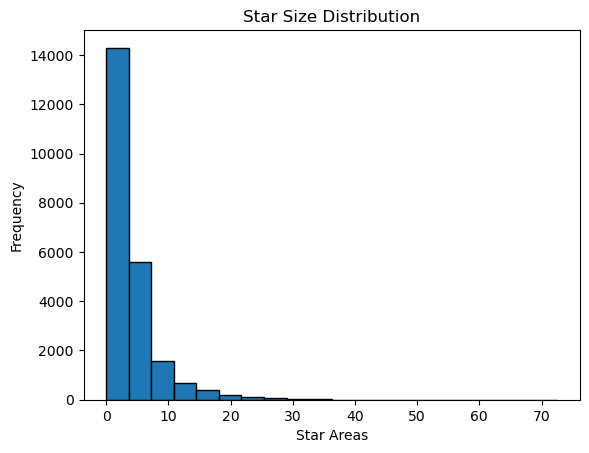

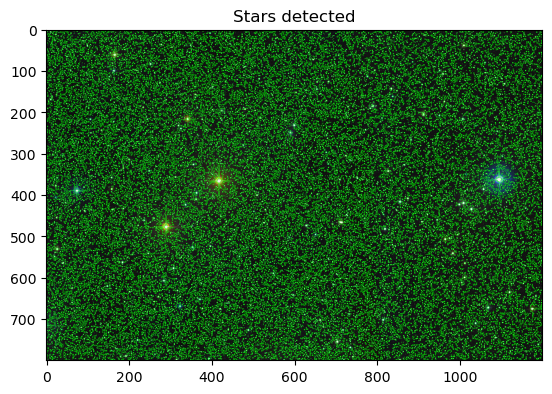

In [6]:
def load_image(image_path):
    image = cv.imread(image_path)
    return image
def preprocess_image(image):
    blurred = cv.GaussianBlur(image, (1, 1), 0)
    background = cv.morphologyEx(blurred, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)))
    subtracted = cv.subtract(blurred, background)
    gray = cv.cvtColor(subtracted, cv.COLOR_BGR2GRAY)
    binary = cv.Canny(gray, 10, 150)
    return binary
def find_contours(binary_image):
    contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours
def filter_contours(contours, min_area=0, max_area=50, max_aspect_ratio=5.0):
    filtered_contours = []
    for c in contours:
        area = cv.contourArea(c)
        if area < min_area:
            continue
            
        x, y, w, h = cv.boundingRect(c)
        aspect_ratio = float(w) / h
        if aspect_ratio > max_aspect_ratio:
            continue
            
        filtered_contours.append(c)
        
    return filtered_contours
def analyze_contours(contours):
    areas = [cv.contourArea(c) for c in contours]
    return areas
def main(image_path):
    image = load_image(image_path)
    binary_image = preprocess_image(image)
    contours = find_contours(binary_image)
    filtered_contours = filter_contours(contours)
    areas = analyze_contours(filtered_contours)
    contour_img = cv.drawContours(image, filtered_contours, -1, (0, 255, 0), 1)
    cv.imwrite('photos/stars detected.jpg', contour_img)
    
    print('Number of stars detected:', len(areas))
    #print('Stars areas:', areas)
    #print('Mean star area:', np.mean(areas))
    #print('Median star area:', np.median(areas))
    #print('Standard deviation of star area:', np.std(areas))
    #print('Minimun star area:', np.min(areas))
    #print('Maximum star area:', np.max(areas))
    
    plt.hist(areas, bins=20, edgecolor='black')
    plt.title('Star Size Distribution')
    plt.xlabel('Star Areas')
    plt.ylabel('Frequency')
    plt.show()

    plt.imshow(contour_img)
    plt.title('Stars detected')
    plt.show()

if __name__ == "__main__":
    image_path = 'photos/what-are-stars-explained.jpg'
    main(image_path)